# Greedy Best-First Search

Greedy Best-First is the impatient version of A*. It only cares about getting closer to the goal, ignoring how far it has traveled.

## The Core Strategy

**Always pick the node that looks closest to the goal.**

Like a person walking through a city who only looks at their compass, ignoring the actual roads. They keep heading in the goal's direction even if it means taking longer detours.

## The Formula

**Greedy:** f(n) = h(n) only
**A*:** f(n) = g(n) + h(n)

Greedy ignores g(n) - the cost already paid.

## When Greedy Works Well

```
S . . . G

Greedy goes straight: S → → → → G
Perfect! Shortest path.
```

## When Greedy Fails

```
S . . X X
. . . X G
X X X X .

Greedy tries to go right (toward G), hits wall, gets stuck.
Has to backtrack because it ignored the actual path cost.
```

The problem: Greedy can get trapped pursuing shortcuts that don't exist.

In [1]:
import heapq
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [2]:
class Grid:
    def __init__(self, width, height, obstacles, start, goal):
        self.width = width
        self.height = height
        self.obstacles = set(obstacles)
        self.start = start
        self.goal = goal
    
    def neighbors(self, pos):
        x, y = pos
        candidates = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        return [
            (nx, ny) for nx, ny in candidates
            if 0 <= nx < self.width and 0 <= ny < self.height
            and (nx, ny) not in self.obstacles
        ]
    
    def heuristic(self, pos):
        """Manhattan distance to goal"""
        return abs(pos[0] - self.goal[0]) + abs(pos[1] - self.goal[1])

print("Grid ready")

Grid ready


## Greedy Algorithm Step by Step

**Setup:** (same as A*)
```python
open_set = [(h(start), start)]  # Priority queue with heuristic only
came_from = {}
visited = set()
```

**Main Loop:**

**Step 1:** Pop node with lowest heuristic
```python
_, current = heappop(open_set)
```

**Step 2:** Check if done
```python
if current == goal:
    return reconstruct_path()
```

**Step 3:** Add all unvisited neighbors
```python
for neighbor in neighbors(current):
    if neighbor not in visited:
        heappush(open_set, (heuristic(neighbor), neighbor))
        came_from[neighbor] = current
        visited.add(neighbor)
```

Notice: No cost tracking! Only h(n).

## Example Walkthrough

```
Grid:
S . . .
. X . .
. X . G

Heuristics (Manhattan distance):
S: h=6, (1,0): h=5, (0,1): h=6

Step 1:
  Open: [(6, S)]
  Expand S
  Open: [(5, (1,0)), (6, (0,1))]

Step 2:
  Pick (1,0) because h=5 < 6
  From (1,0), can't go right (wall)
  Add (2,0)
  Open: [(4, (2,0)), (6, (0,1))]

Step 3:
  Pick (2,0) because h=4 is lowest
  Continue toward goal...
```

Greedy always picks the node that looks closest to the goal by straight-line distance.

In [3]:
def greedy_best_first(grid):
    """
    Greedy Best-First: only uses heuristic, ignores cost so far
    """
    open_set = []
    counter = 0
    heapq.heappush(open_set, (grid.heuristic(grid.start), counter, grid.start))
    counter += 1
    
    came_from = {}
    visited = []
    closed_set = set()
    
    while open_set:
        _, _, current = heapq.heappop(open_set)
        
        if current in closed_set:
            continue
        
        closed_set.add(current)
        visited.append(current)
        
        if current == grid.goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1], visited
        
        for neighbor in grid.neighbors(current):
            if neighbor not in closed_set:
                if neighbor not in came_from:
                    came_from[neighbor] = current
                    h = grid.heuristic(neighbor)
                    heapq.heappush(open_set, (h, counter, neighbor))
                    counter += 1
    
    return None, visited

print("Greedy Best-First ready")

Greedy Best-First ready


In [4]:
def visualize(grid, path, visited, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, grid.width)
    ax.set_ylim(0, grid.height)
    ax.set_aspect('equal')
    
    for x in range(grid.width):
        for y in range(grid.height):
            color = 'white'
            if (x, y) in grid.obstacles:
                color = 'black'
            elif (x, y) in visited:
                color = 'lightblue'
            
            rect = patches.Rectangle((x, y), 1, 1,
                                     linewidth=1, edgecolor='gray',
                                     facecolor=color, alpha=0.6)
            ax.add_patch(rect)
    
    # Draw path
    if path:
        for i in range(len(path) - 1):
            x1, y1 = path[i]
            x2, y2 = path[i+1]
            ax.arrow(x1+0.5, y1+0.5, x2-x1, y2-y1,
                    head_width=0.2, head_length=0.2,
                    fc='red', ec='red', linewidth=2, length_includes_head=True)
        
        for x, y in path[1:-1]:
            rect = patches.Rectangle((x, y), 1, 1,
                                     linewidth=2, edgecolor='red',
                                     facecolor='yellow', alpha=0.6)
            ax.add_patch(rect)
    
    ax.text(grid.start[0]+0.5, grid.start[1]+0.5, 'S',
           ha='center', va='center', fontsize=20, fontweight='bold', color='green')
    ax.text(grid.goal[0]+0.5, grid.goal[1]+0.5, 'G',
           ha='center', va='center', fontsize=20, fontweight='bold', color='red')
    
    ax.set_xticks(range(grid.width))
    ax.set_yticks(range(grid.height))
    ax.grid(True, alpha=0.3)
    ax.set_title(f'{title} | Path: {len(path)} | Explored: {len(visited)}',
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("Visualization ready")

Visualization ready


## Example: When Greedy Works Well

Path length: 16
Nodes explored: 19


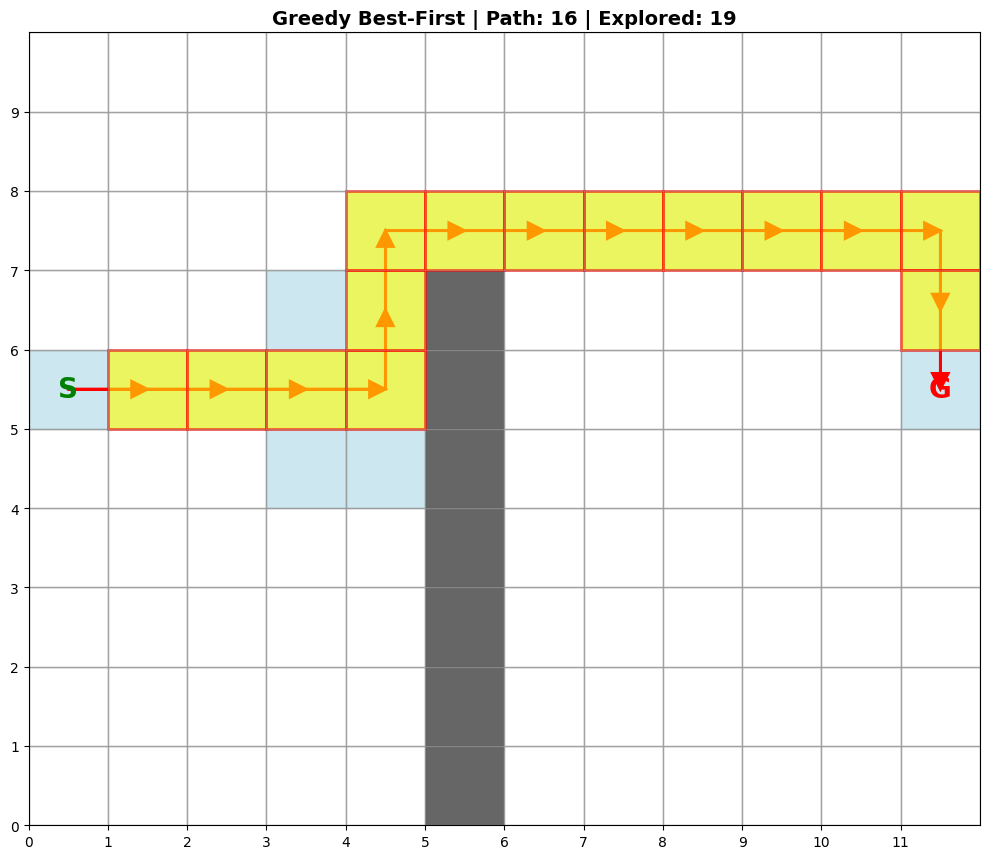

In [5]:
# Simple barrier - greedy heads straight for goal
obstacles = [(5, y) for y in range(7)]
grid = Grid(12, 10, obstacles, (0, 5), (11, 5))

path, visited = greedy_best_first(grid)
print(f"Path length: {len(path)}")
print(f"Nodes explored: {len(visited)}")
visualize(grid, path, visited, "Greedy Best-First")

## Where Greedy Can Fail

Greedy can be misled by the heuristic into taking a longer path.

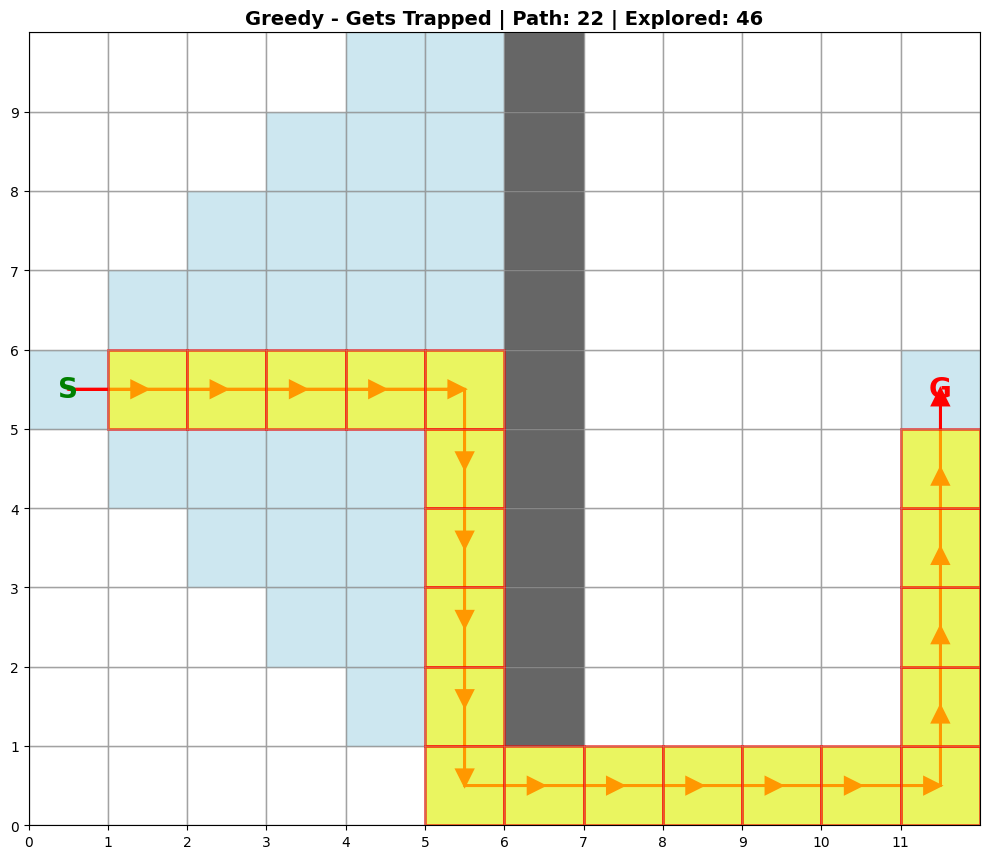

Greedy found goal but took a long route!
Path length: 22
Explored: 46 nodes


In [6]:
# Create a trap - goal is close but path is long
trap_obstacles = [
    (6, y) for y in range(10) if y != 0  # Wall with opening only at bottom
]

grid_trap = Grid(12, 10, trap_obstacles, (0, 5), (11, 5))

path_greedy, visited_greedy = greedy_best_first(grid_trap)
visualize(grid_trap, path_greedy, visited_greedy, "Greedy - Gets Trapped")

print("Greedy found goal but took a long route!")
print(f"Path length: {len(path_greedy)}")
print(f"Explored: {len(visited_greedy)} nodes")

## Greedy Trap Scenario

This scenario shows where Greedy fails hard.

Grid world created
A* implementation ready
Visualization ready
Running A*...
Path found! Length: 21
Nodes explored: 58


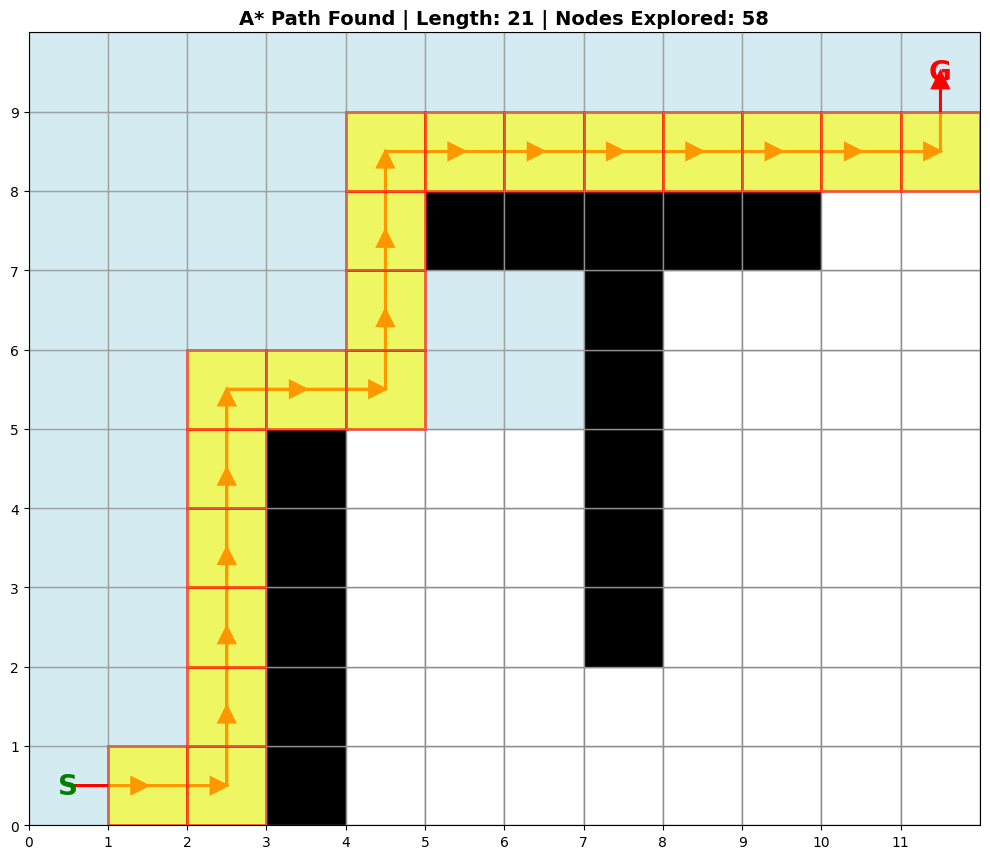

Open space:
Path length: 19, Nodes explored: 100


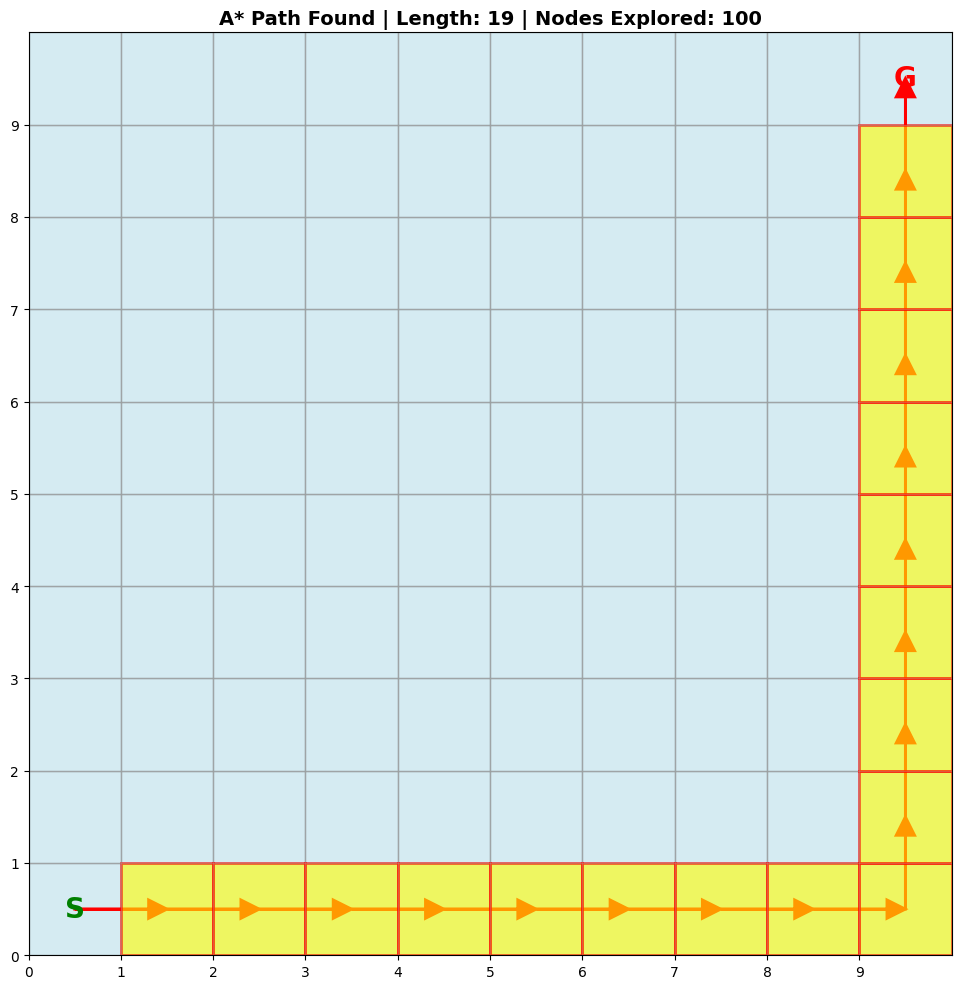

Long barrier:
Path length: 20, Nodes explored: 76


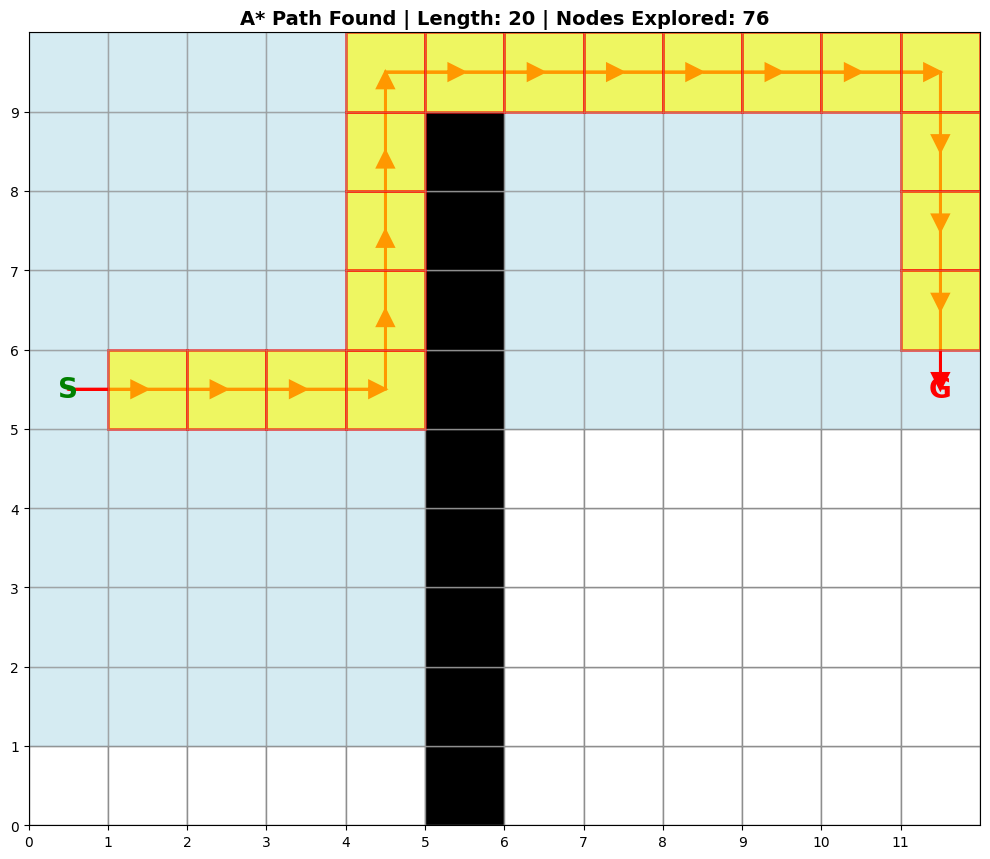

Grid ready
BFS ready
DFS ready
Visualization ready
Running BFS...


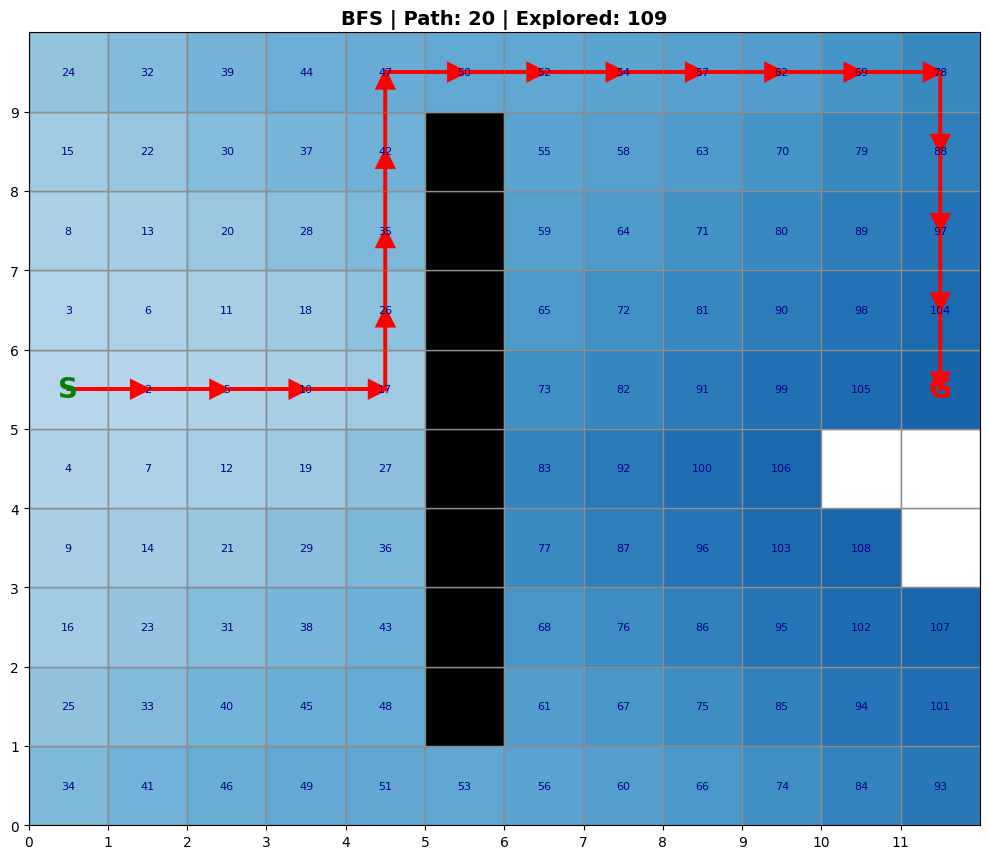


Running DFS...


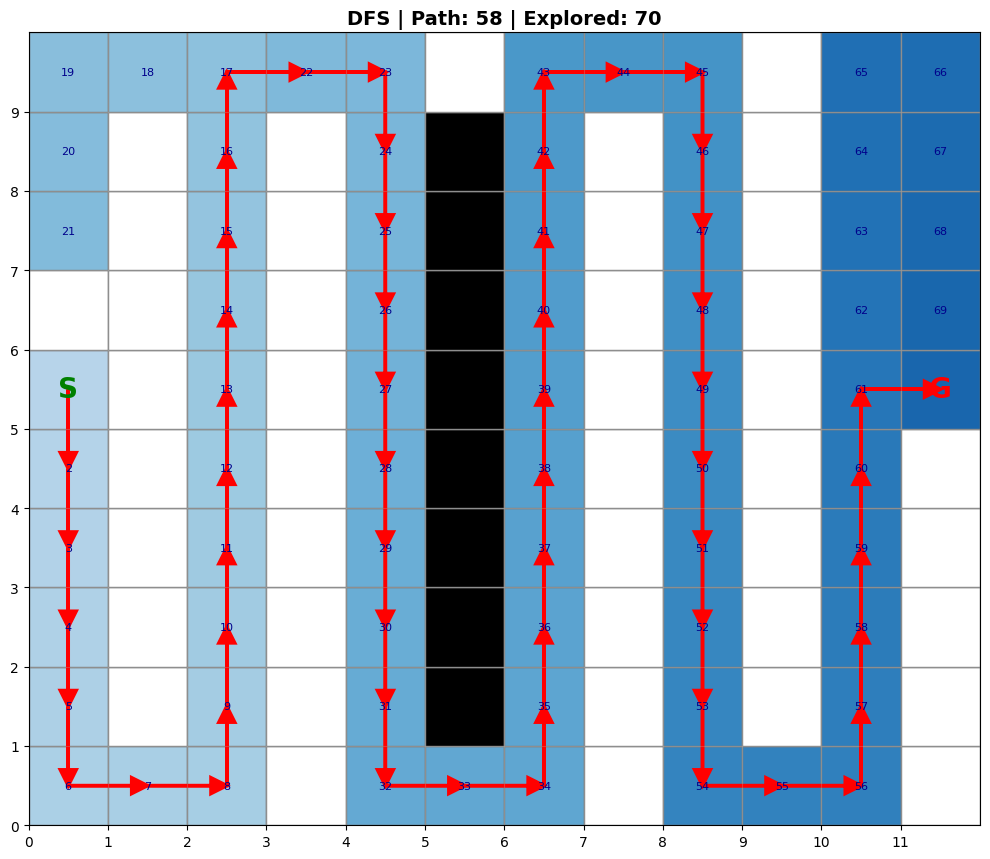

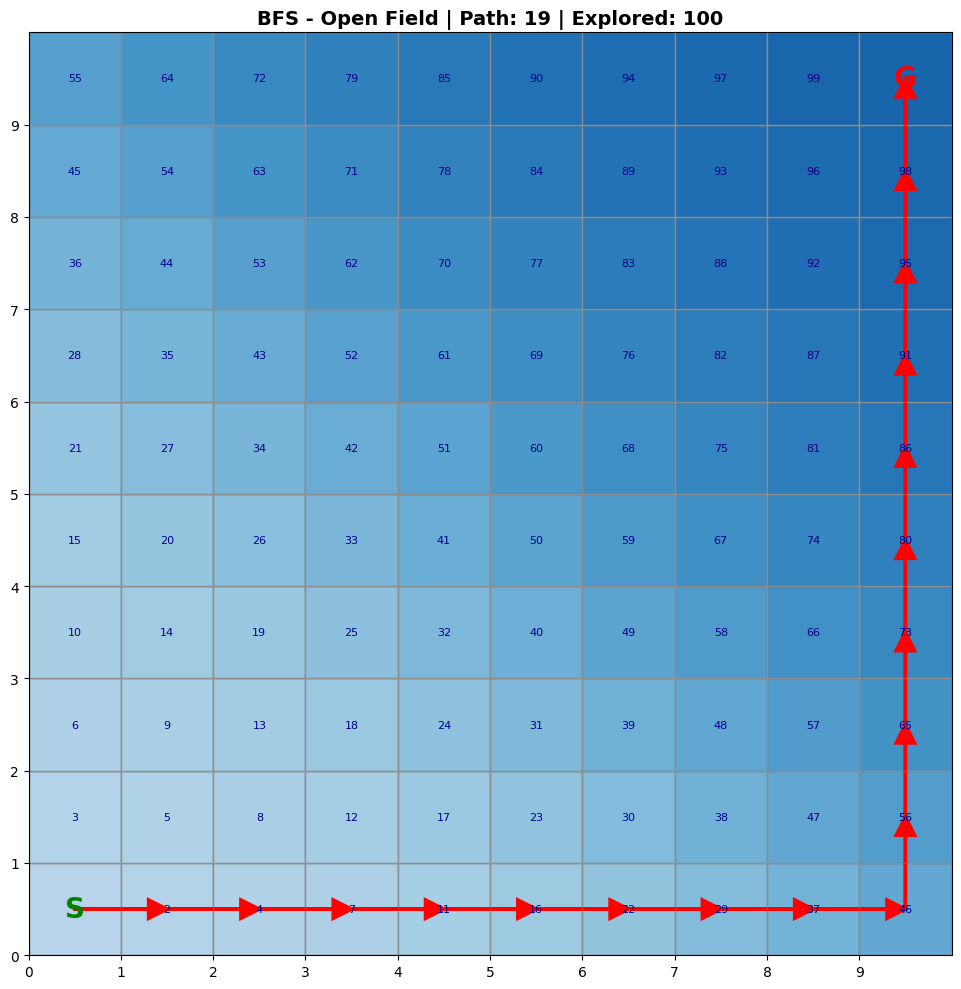

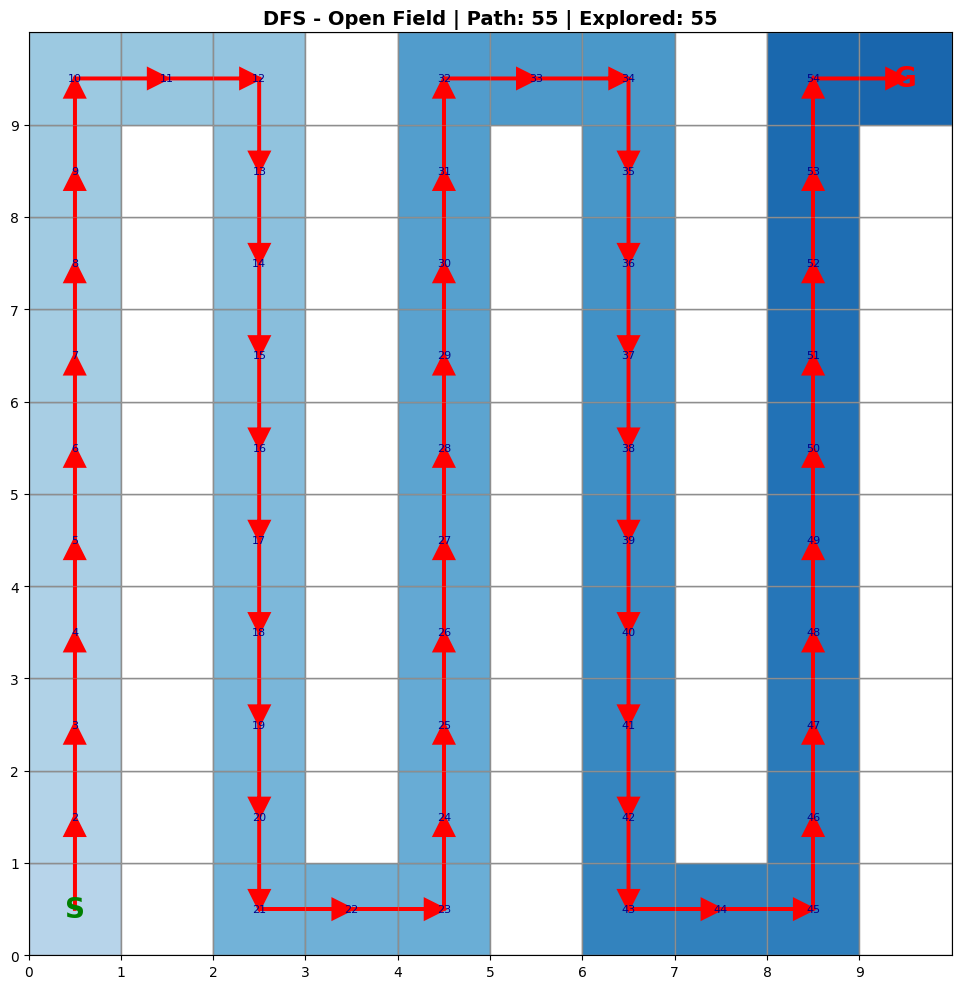

BFS explored 100 nodes, path length 19
DFS explored 55 nodes, path length 55


AttributeError: 'Grid' object has no attribute 'heuristic'

In [ ]:
# Compare with other algorithms
# Save our greedy function before running other notebooks
greedy_func = greedy_best_first
local_Grid = Grid

%run AStar_Search.ipynb
%run BFS_DFS.ipynb

obstacles = [(5, y) for y in range(8)]

# Greedy - use our local Grid class
grid_g = local_Grid(12, 10, obstacles, (0, 5), (11, 5))
path_g, visited_g = greedy_func(grid_g)
print("Greedy:")
print(f"  Path: {len(path_g)}, Explored: {len(visited_g)}")
visualize(grid_g, path_g, visited_g, "Greedy")

# A* - use GridWorld from AStar_Search
grid_a = GridWorld(12, 10, obstacles, (0, 5), (11, 5))
path_a, visited_a = a_star(grid_a)
print("\nA*:")
print(f"  Path: {len(path_a)}, Explored: {len(visited_a)}")

# BFS - use GridWorld from BFS_DFS
path_b, visited_b = bfs(grid_a)
print("\nBFS:")
print(f"  Path: {len(path_b)}, Explored: {len(visited_b)}")

print(f"\n--- Comparison ---")
print(f"Greedy explored: {len(visited_g)} nodes")
print(f"A* explored: {len(visited_a)} nodes")
print(f"BFS explored: {len(visited_b)} nodes")

## What Went Wrong?

Look at the top grid. Greedy found a path, but it explored a lot of nodes before succeeding.

Now look at the bottom grid - the trap. **Greedy heads straight for the goal**, ignoring the fact that there's a wall. It explores deeply into the dead end because those nodes have low h values (close to goal).

**The problem:** Greedy sees nodes near the goal and thinks "perfect!" even though they're behind a wall.

## Greedy vs A*

**Greedy advantage:** Faster - explores fewer nodes when obstacles don't block the direct path.

**Greedy disadvantage:** 
1. Can get trapped exploring dead ends that point toward the goal
2. Doesn't guarantee shortest path - only cares about straight-line distance

**When to use Greedy:**
- When you need a solution fast and don't care if it's optimal
- When the environment has few obstacles between start and goal
- When speed matters more than path quality

**When to use A*:**
- When you need the shortest path guaranteed
- When obstacles create complex mazes
- When the extra computation is acceptable

## The Key Insight

Greedy is like following a compass blindly. A* is like following a compass while also checking your map.

Both use heuristics, but only A* balances heuristic guidance with actual path cost.